In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
train=pd.read_csv("mnist_train.csv")

In [8]:
test=pd.read_csv("mnist_test.csv")

In [9]:
test.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
train=np.array(train)
test=np.array(test)

train.shape


(60000, 785)

In [67]:
Y_train = train[:, 0] 
Y_test = test[:, 0]    
X_train = np.delete(train, 0, axis=1)
X_test = np.delete(test, 0, axis=1)  
X_train = X_train / 255.0
X_test = X_test / 255.0


X_train = X_train.T  
X_test = X_test.T 
X_train.shape


(784, 60000)

In [80]:
def init():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [81]:
def relu(z):
    return np.maximum(0,z)

def softmax(z):
    z = z - np.max(z, axis=0, keepdims=True)  
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)
    
def forward(W1,b1,W2,b2,X):
    z1=W1.dot(X)+b1
    a1=relu(z1)
    z2=W2.dot(a1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2

In [82]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(z):
    return z>0

def backprop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_y=one_hot(Y)
    dZ2=A2-one_hot_y
    m=Y.size
    dW2=(1/m)*dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2



In [93]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2=init()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2=backprop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2=update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1,b1,W2,b2
def gradient_descent_extra(X,Y,iterations,alpha,W1,b1,W2,b2):
    for i in range(iterations):
        Z1,A1,Z2,A2=forward(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2=backprop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2=update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1,b1,W2,b2

In [88]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,4000,0.01)

Iteration:  0
[4 2 4 ... 8 4 1] [5 0 4 ... 5 6 8]
0.1367
Iteration:  50
[8 1 4 ... 9 4 8] [5 0 4 ... 5 6 8]
0.17361666666666667
Iteration:  100
[8 1 4 ... 9 4 8] [5 0 4 ... 5 6 8]
0.2274
Iteration:  150
[8 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.2648333333333333
Iteration:  200
[8 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.29158333333333336
Iteration:  250
[8 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.3118166666666667
Iteration:  300
[8 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.32985
Iteration:  350
[8 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.34678333333333333
Iteration:  400
[8 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.36296666666666666
Iteration:  450
[8 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.3801
Iteration:  500
[7 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.40071666666666667
Iteration:  550
[7 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.42111666666666664
Iteration:  600
[7 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.4417833333333333
Iteration:  650
[7 0 4 ... 9 6 8] [5 0 4 ... 5 6 8]
0.4633333333333333
Iteration:  700
[7 0 4 ... 9 6 8] [5 0 4 ... 5 6 8

In [94]:
W1,b1,W2,b2=gradient_descent_extra(X_train,Y_train,1000,0.01,W1,b1,W2,b2)

Iteration:  0
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8332166666666667
Iteration:  50
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8344166666666667
Iteration:  100
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.83555
Iteration:  150
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.83675
Iteration:  200
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8376666666666667
Iteration:  250
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.83865
Iteration:  300
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8397166666666667
Iteration:  350
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8407833333333333
Iteration:  400
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8416333333333333
Iteration:  450
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.84235
Iteration:  500
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8436833333333333
Iteration:  550
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8443666666666667
Iteration:  600
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8450833333333333
Iteration:  650
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8458833333333333
Iteration:  700
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0

In [103]:
W1,b1,W2,b2=gradient_descent_extra(X_train,Y_train,1000,0.01,W1,b1,W2,b2)


Iteration:  0
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8509166666666667
Iteration:  50
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8517666666666667
Iteration:  100
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8524333333333334
Iteration:  150
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8532166666666666
Iteration:  200
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8538833333333333
Iteration:  250
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8543166666666666
Iteration:  300
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8547166666666667
Iteration:  350
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8552166666666666
Iteration:  400
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8558333333333333
Iteration:  450
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8562166666666666
Iteration:  500
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8569833333333333
Iteration:  550
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8575666666666667
Iteration:  600
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.85805
Iteration:  650
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
0.8585833333333334
Iteration:  700
[3 0

Prediction:  [3]
Label:  5


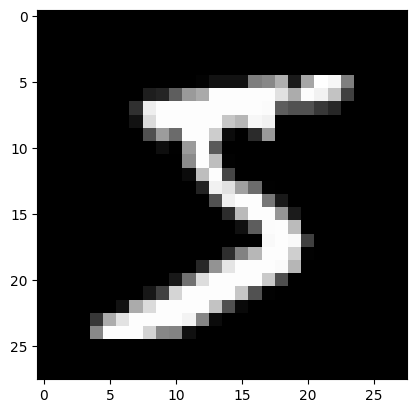

Prediction:  [0]
Label:  0


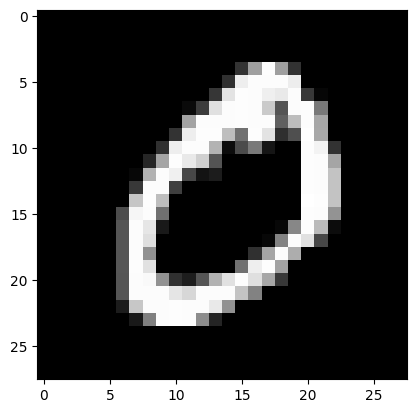

Prediction:  [4]
Label:  4


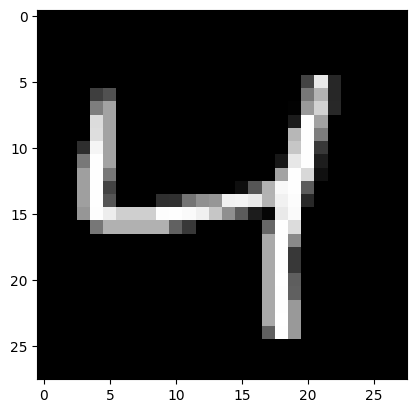

Prediction:  [1]
Label:  1


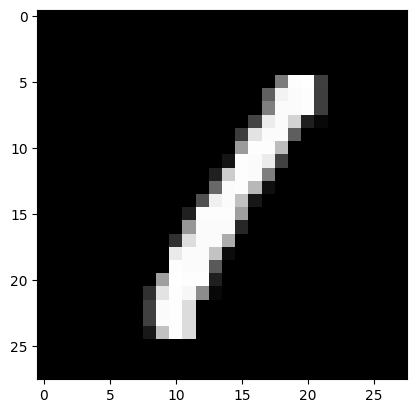

Prediction:  [9]
Label:  9


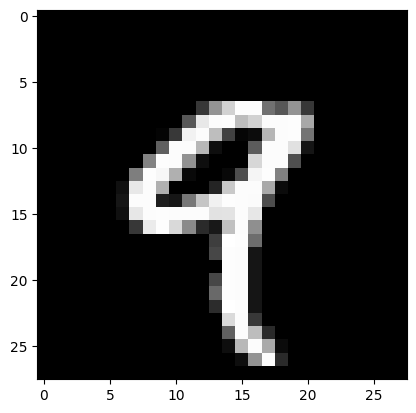

Prediction:  [2]
Label:  2


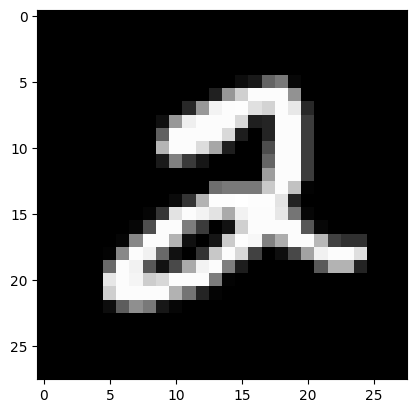

Prediction:  [1]
Label:  1


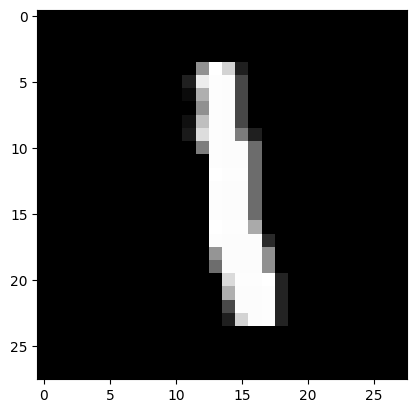

Prediction:  [3]
Label:  3


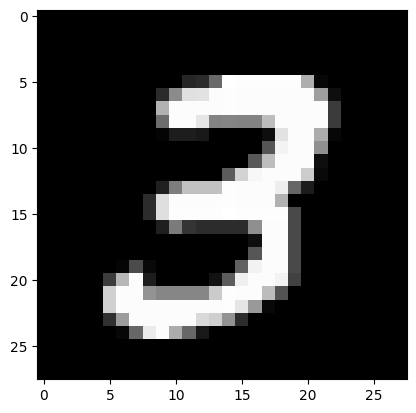

Prediction:  [1]
Label:  1


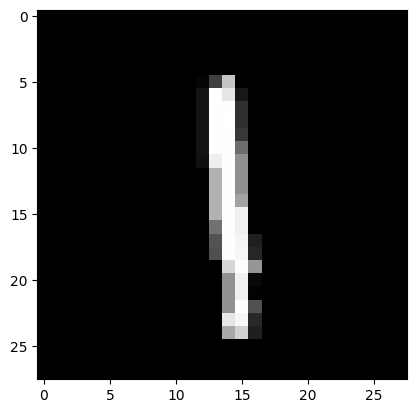

Prediction:  [4]
Label:  4


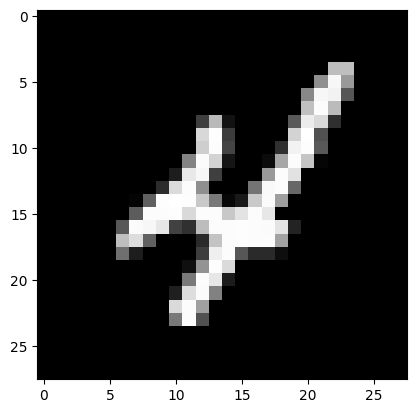

Prediction:  [3]
Label:  3


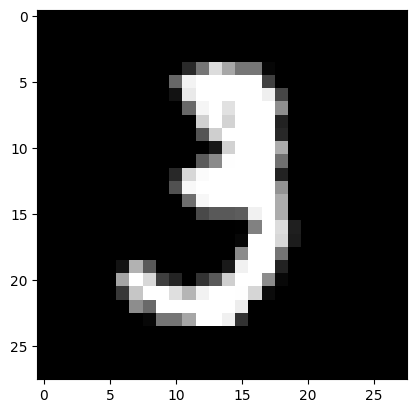

Prediction:  [8]
Label:  5


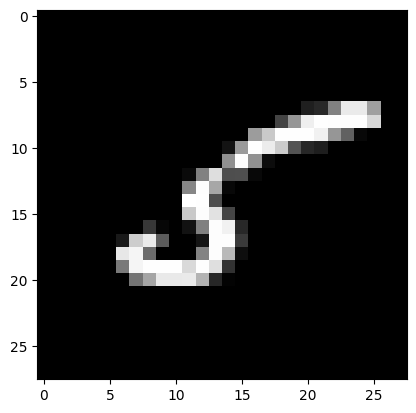

Prediction:  [3]
Label:  3


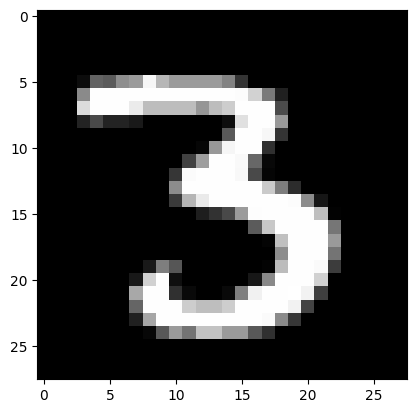

Prediction:  [6]
Label:  6


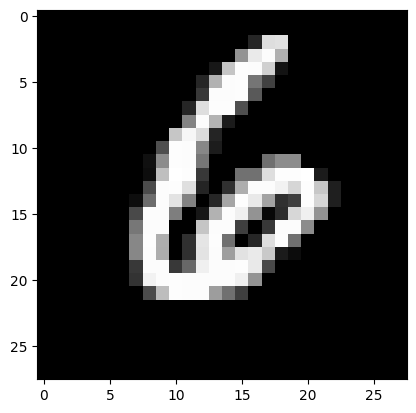

Prediction:  [1]
Label:  1


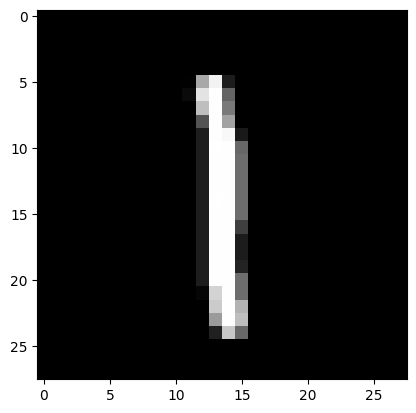

Prediction:  [7]
Label:  7


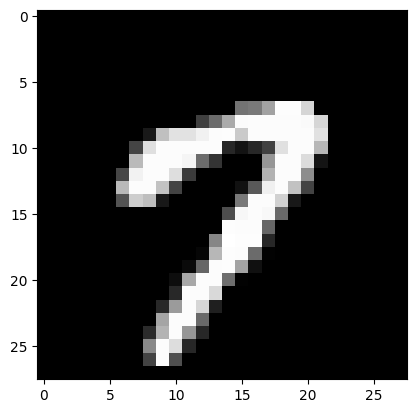

Prediction:  [2]
Label:  2


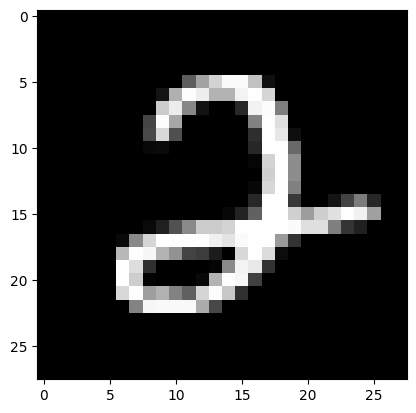

Prediction:  [8]
Label:  8


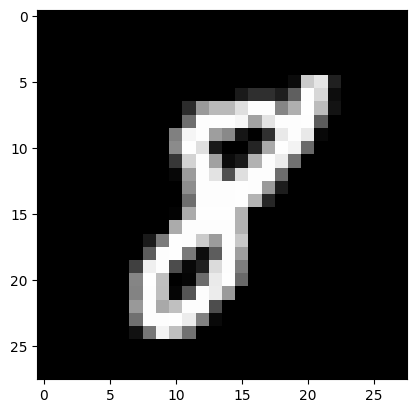

Prediction:  [6]
Label:  6


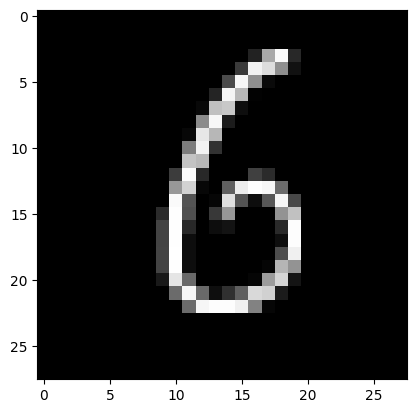

Prediction:  [9]
Label:  9


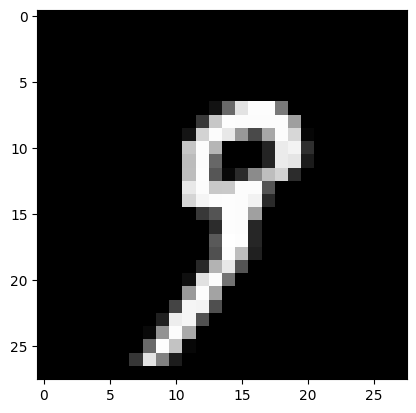

Prediction:  [4]
Label:  4


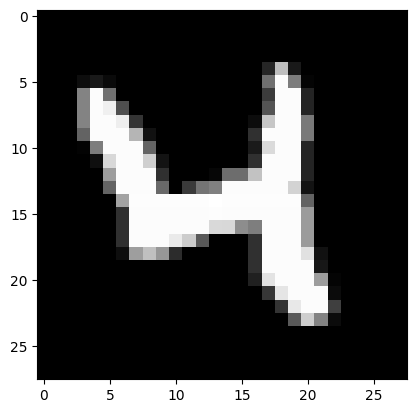

Prediction:  [0]
Label:  0


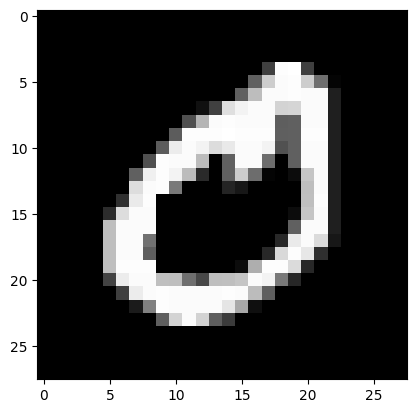

Prediction:  [4]
Label:  9


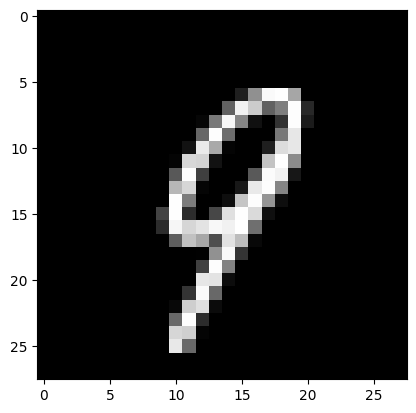

Prediction:  [1]
Label:  1


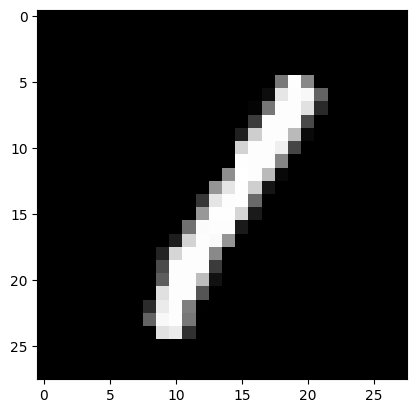

Prediction:  [2]
Label:  1


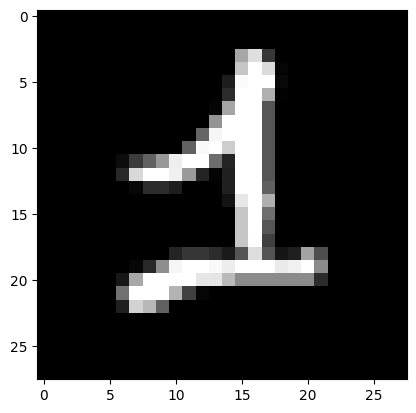

Prediction:  [2]
Label:  2


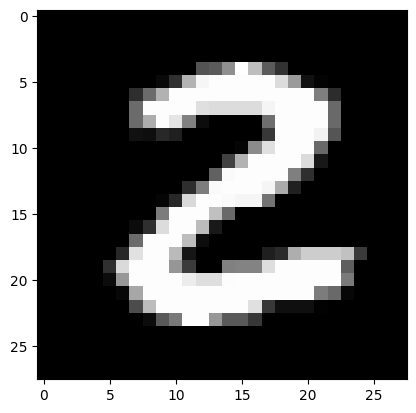

Prediction:  [4]
Label:  4


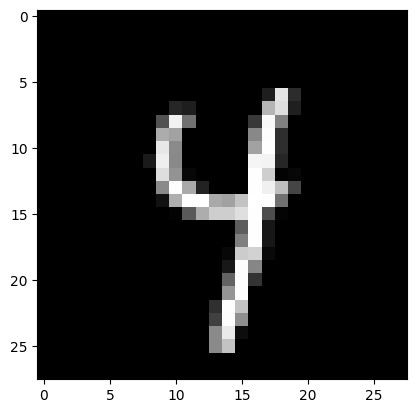

Prediction:  [3]
Label:  3


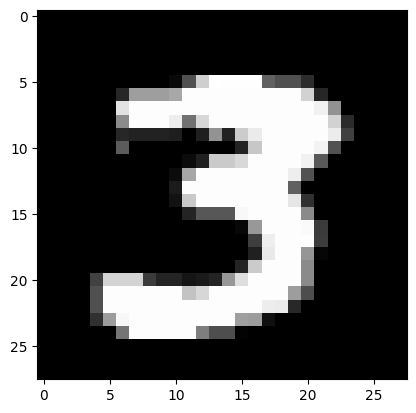

Prediction:  [7]
Label:  2


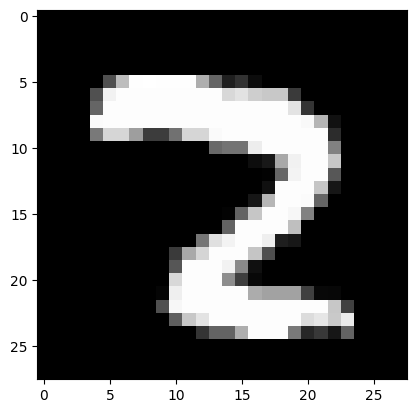

Prediction:  [8]
Label:  7


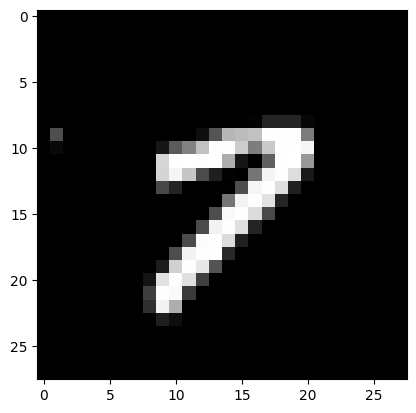

Prediction:  [3]
Label:  3


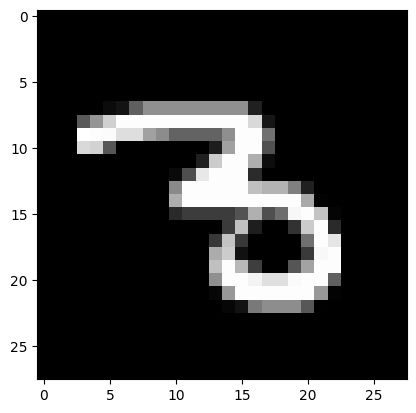

Prediction:  [8]
Label:  8


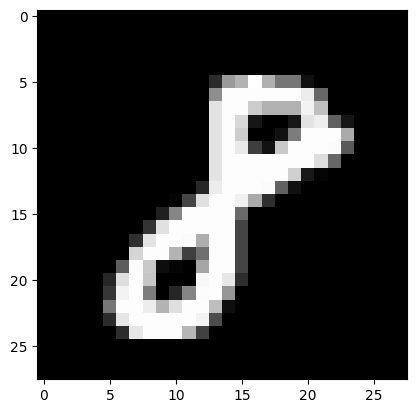

Prediction:  [6]
Label:  6


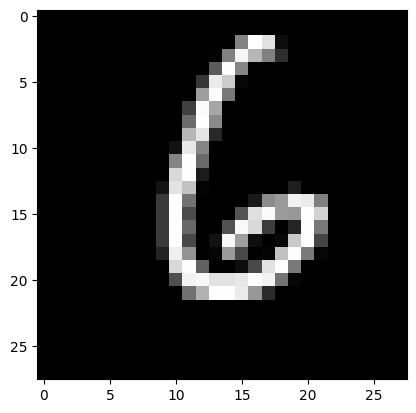

Prediction:  [7]
Label:  9


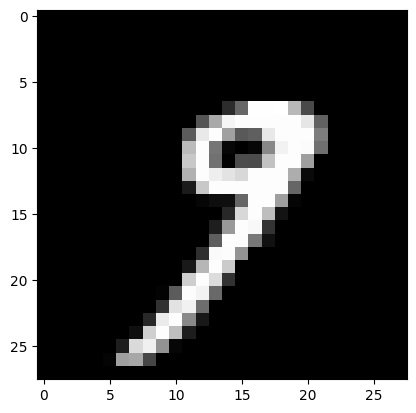

Prediction:  [0]
Label:  0


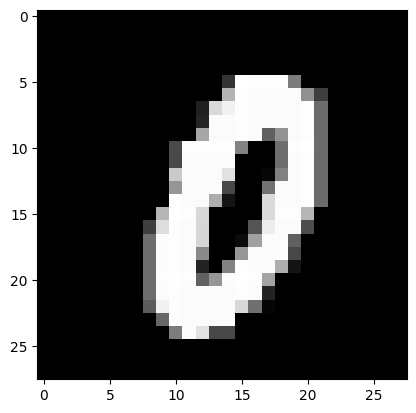

Prediction:  [5]
Label:  5


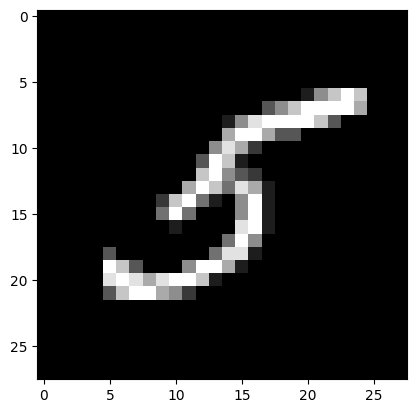

Prediction:  [6]
Label:  6


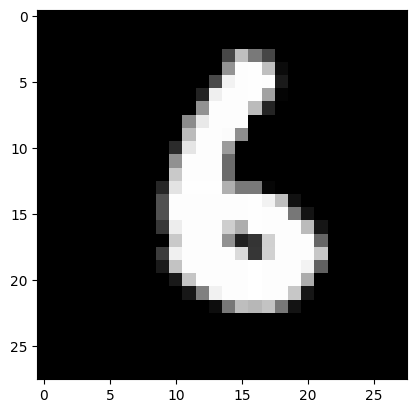

Prediction:  [0]
Label:  0


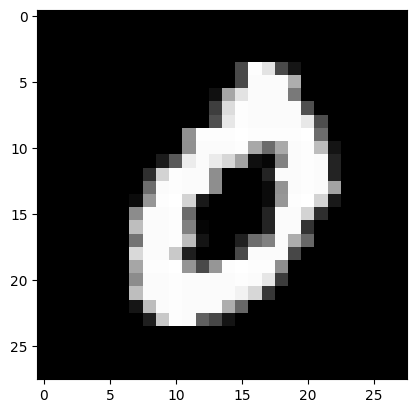

Prediction:  [9]
Label:  7


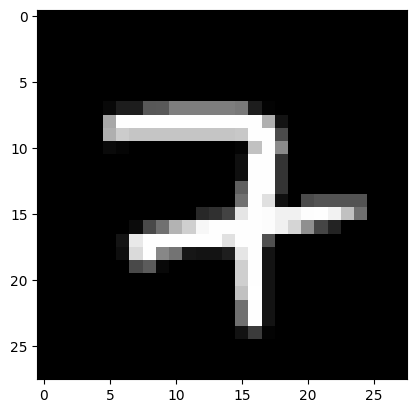

Prediction:  [6]
Label:  6


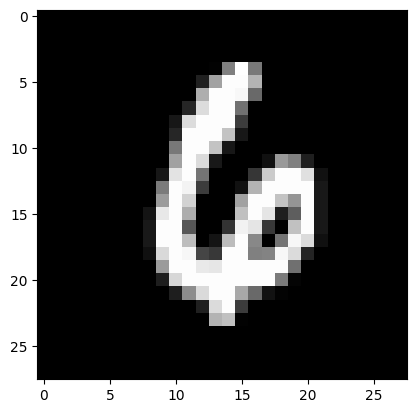

Prediction:  [1]
Label:  1


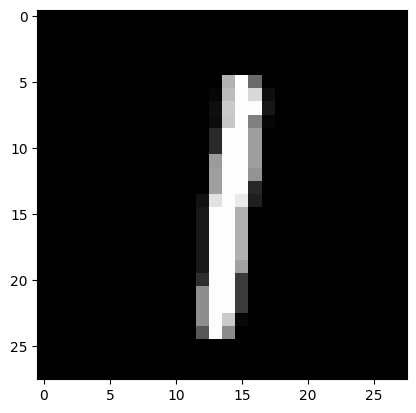

Prediction:  [8]
Label:  8


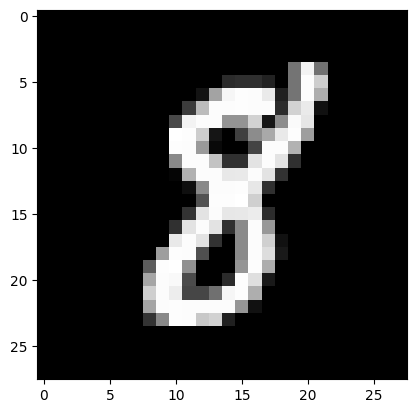

Prediction:  [7]
Label:  7


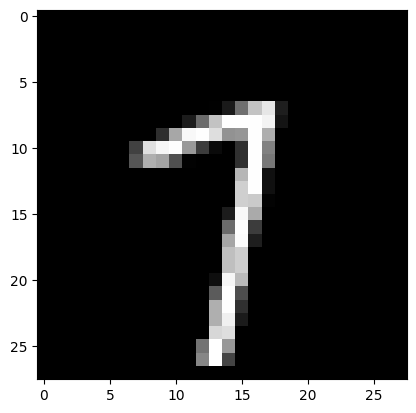

Prediction:  [9]
Label:  9


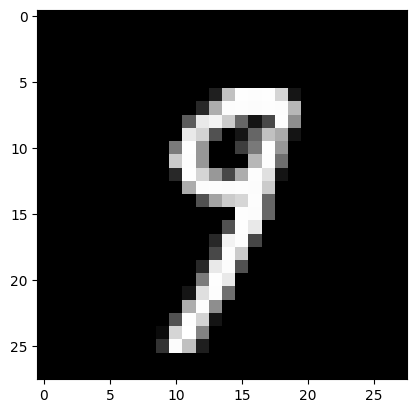

Prediction:  [3]
Label:  3


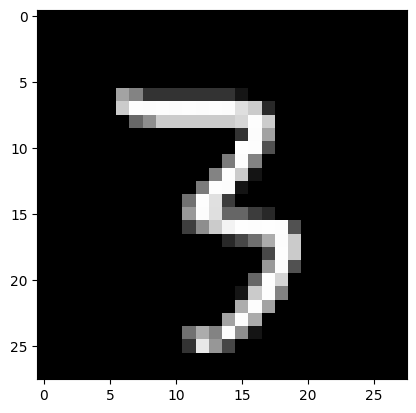

Prediction:  [9]
Label:  9


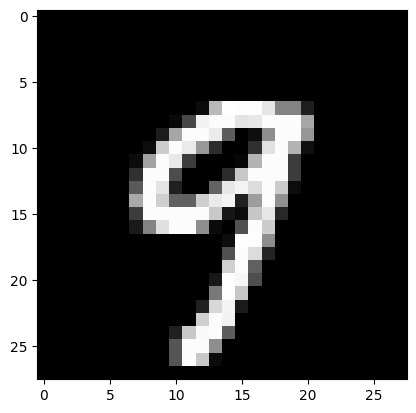

Prediction:  [8]
Label:  8


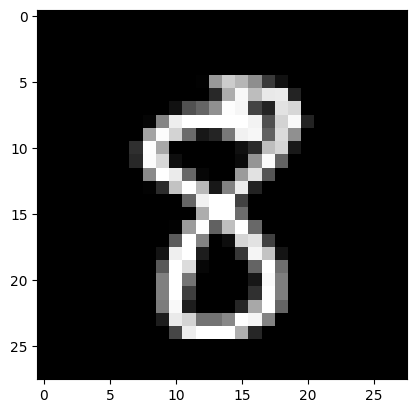

Prediction:  [5]
Label:  5


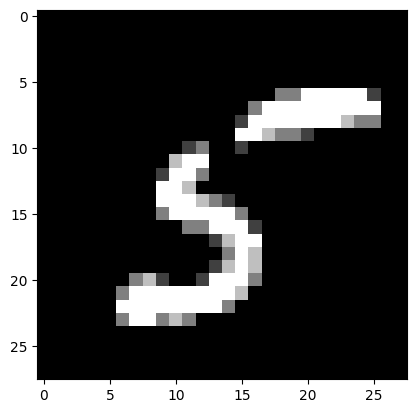

Prediction:  [5]
Label:  9


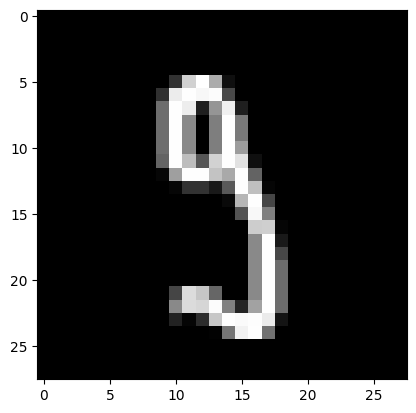

Prediction:  [3]
Label:  3


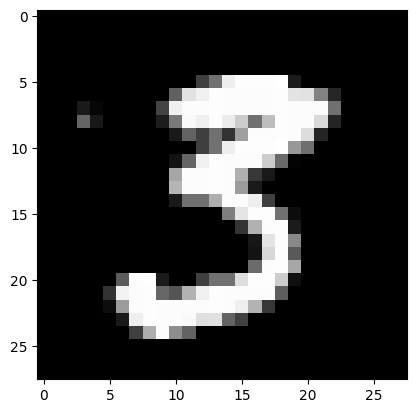

In [104]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


for i in range(50):
    test_prediction(i, W1, b1, W2, b2)